In [2]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
#import sklearn.cross_validation as cross_validation
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [4]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv("data/user_spec.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394216 entries, 0 to 1394215
Data columns (total 17 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   application_id                       1394216 non-null  int64  
 1   user_id                              1394216 non-null  int64  
 2   birth_year                           1381255 non-null  float64
 3   gender                               1381255 non-null  float64
 4   insert_time                          1394216 non-null  object 
 5   credit_score                         1289101 non-null  float64
 6   yearly_income                        1394126 non-null  float64
 7   income_type                          1394131 non-null  object 
 8   company_enter_month                  1222456 non-null  float64
 9   employment_type                      1394131 non-null  object 
 10  houseown_type                        1394131 non-null  object 
 11

In [ ]:
df2 = pd.read_csv("data/user_spec.csv")

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['product_id', 'gender', 'Age', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income', 'label_income_type',
       'label_employment_type', 'label_houseown_type', 'label_purpose',
       'desired_amount', 'personal_rehabilitation_yn',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt','work_day']], df['is_applied'])

train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis= 1)

KeyError: "['product_id', 'Age', 'loan_limit', 'loan_rate', 'label_income_type', 'label_employment_type', 'label_houseown_type', 'label_purpose', 'work_day'] not in index"

In [8]:
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

In [9]:
train_x = train.drop(['is_applied'], axis=1)
train_y = train['is_applied']

In [10]:
# logistic regression
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

In [12]:
print (accuracy_score(y_test, y_pred))

0.9607989750267796


In [13]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [14]:
print (fit_and_evaluate(cls))

0.03920102497322048


In [15]:
# Try random forest method
random_forest = RandomForestRegressor(random_state=60)

In [17]:
print (fit_and_evaluate(random_forest))

0.05940044400295698


Index(['product_id', 'gender', 'Age', 'loan_limit', 'loan_rate',
       'credit_score', 'yearly_income', 'label_income_type',
       'label_employment_type', 'label_houseown_type', 'label_purpose',
       'desired_amount', 'personal_rehabilitation_yn',
       'personal_rehabilitation_complete_yn', 'existing_loan_cnt',
       'existing_loan_amt', 'work_day'],
      dtype='object')


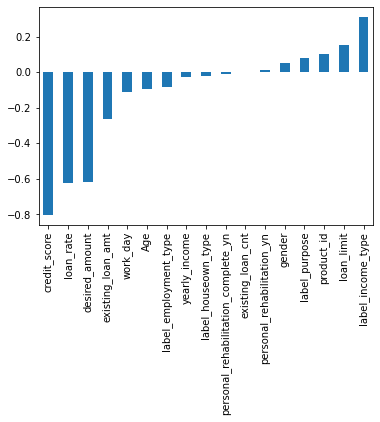

label_income_type                      0.311456
loan_limit                             0.155098
product_id                             0.103745
label_purpose                          0.079176
gender                                 0.052498
personal_rehabilitation_yn             0.012535
existing_loan_cnt                      0.000000
personal_rehabilitation_complete_yn   -0.011225
label_houseown_type                   -0.019200
yearly_income                         -0.023576
label_employment_type                 -0.085374
Age                                   -0.091263
work_day                              -0.111542
existing_loan_amt                     -0.263735
desired_amount                        -0.614981
loan_rate                             -0.624346
credit_score                          -0.801200
dtype: float64


In [21]:
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print(X_train.columns)
coefs = coefs.sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()
print(coefs.sort_values(ascending = False))

In [34]:
# Try one hot encoding

# Copy the original data
features = df.copy()

# Select the numeric columns
numeric_subset = df.select_dtypes('number')
categorical_subset = df.select_dtypes('object')

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns.drop("is_applied")])

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
print (features.head())

KeyError: "['is_applied'] not found in axis"

In [23]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.9607989750267796


In [24]:
print (fit_and_evaluate(cls))

0.03920102497322048


In [25]:
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print (coefs.sort_values(ascending = False))

label_income_type                      0.311456
loan_limit                             0.155098
product_id                             0.103745
label_purpose                          0.079176
gender                                 0.052498
personal_rehabilitation_yn             0.012535
existing_loan_cnt                      0.000000
personal_rehabilitation_complete_yn   -0.011225
label_houseown_type                   -0.019200
yearly_income                         -0.023576
label_employment_type                 -0.085374
Age                                   -0.091263
work_day                              -0.111542
existing_loan_amt                     -0.263735
desired_amount                        -0.614981
loan_rate                             -0.624346
credit_score                          -0.801200
dtype: float64


In [8]:
from imblearn.over_sampling import SMOTE

smote_x, smote_y = SMOTE(random_state=0).fit_sample(train_x, train_y)
smote_x = smote_x.round(0)  # 1~5의 int 값으로 나타내기 위해 반올림
smote_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828662 entries, 0 to 1828661
Data columns (total 18 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   Unnamed: 0                           int64  
 1   product_id                           int64  
 2   gender                               float64
 3   Age                                  float64
 4   loan_limit                           float64
 5   loan_rate                            float64
 6   credit_score                         float64
 7   yearly_income                        float64
 8   label_income_type                    int64  
 9   label_employment_type                int64  
 10  label_houseown_type                  int64  
 11  label_purpose                        int64  
 12  desired_amount                       float64
 13  personal_rehabilitation_yn           float64
 14  personal_rehabilitation_complete_yn  float64
 15  existing_loan_cnt               

In [11]:
num_folds = 10
seed = 7
scoring = 'neg_root_mean_squared_error'

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(smote_x, smote_y,test_size=0.2,random_state=seed)

In [14]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
###Base model 비교

In [ ]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('EN',ElasticNet()))
models.append(('SVM',SVR()))
models.append(('RFR',RandomForestRegressor()))
models.append(('XGBR',XGBRegressor()))
models.append(('AdaR',AdaBoostRegressor()))
models.append(('Cat',CatBoostRegressor(verbose=False)))
models.append(('Xtree',ExtraTreesRegressor()))

results =[]
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,X_train,y_train
                               ,cv= kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

LR : -0.418340 (0.000621) 
LASSO : -0.451408 (0.000309) 


In [ ]:
### Standardization

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',preprocessing.StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',preprocessing.StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',preprocessing.StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',preprocessing.StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',preprocessing.StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledSVM',Pipeline([('Scaler',preprocessing.StandardScaler()),('SVM',SVR())])))
pipelines.append(('ScaledRFR',Pipeline([('Scaler',preprocessing.StandardScaler()),('RFR',RandomForestRegressor())])))
pipelines.append(('ScaledXGBR',Pipeline([('Scaler',preprocessing.StandardScaler()),('XGBR',XGBRegressor())])))
pipelines.append(('ScaledLGBMR',Pipeline([('Scaler',preprocessing.StandardScaler()),('LGBMR',LGBMRegressor())])))
pipelines.append(('ScaledAdaR',Pipeline([('Scaler',preprocessing.StandardScaler()),('AdaR',AdaBoostRegressor())])))
pipelines.append(('ScaledCat',Pipeline([('Scaler',preprocessing.StandardScaler()),('Cat',CatBoostRegressor(verbose=False))])))
pipelines.append(('ScaledXtree',Pipeline([('Scaler',preprocessing.StandardScaler()),('Xtree',ExtraTreesRegressor())])))

results_scaled =[]
names_scaled = []
for name, model in pipelines:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,X_train,y_train
                               ,cv= kfold,scoring=scoring)
  results_scaled.append(cv_results)
  names_scaled.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

In [2]:
log = pd.read_csv("log_data_clean.csv")
log.head()

,Unnamed: 0,user_id,event,timestamp,date_cd
0,0,576409,StartLoanApply,2022-03-25 11:12:09,2022-03-25
1,1,576409,ViewLoanApplyIntro,2022-03-25 11:12:09,2022-03-25
2,2,72878,EndLoanApply,2022-03-25 11:14:44,2022-03-25
3,3,645317,OpenApp,2022-03-25 11:15:09,2022-03-25
4,4,645317,UseLoanManage,2022-03-25 11:15:11,2022-03-25


In [5]:
## 이번 코드는 4장에서 가공한 데이터프레임과 비슷한데, 6개월-> 1개월로 단축하였으므로 이전에 만든 코드를 조금만 수정하자.
year_months = list(log['date_cd'].unique())
uselog = pd.DataFrame() #비슷하게 빈 데이터프레임을 생성하고 여기에 가공한 데이터를 쌓아준다.
year_months

['2022-03-25',
 '2022-03-01',
 '2022-05-21',
 '2022-05-05',
 '2022-04-23',
 '2022-06-26',
 '2022-05-15',
 '2022-05-28',
 '2022-04-14',
 '2022-04-29',
 '2022-04-10',
 '2022-04-16',
 '2022-03-08',
 '2022-03-07',
 '2022-04-24',
 '2022-03-09',
 '2022-03-27',
 '2022-03-04',
 '2022-04-19',
 '2022-03-03',
 '2022-03-29',
 '2022-03-17',
 '2022-05-06',
 '2022-04-25',
 '2022-03-28',
 '2022-04-12',
 '2022-05-18',
 '2022-03-21',
 '2022-03-15',
 '2022-04-08',
 '2022-04-06',
 '2022-05-12',
 '2022-06-01',
 '2022-05-09',
 '2022-06-03',
 '2022-06-04',
 '2022-05-20',
 '2022-05-14',
 '2022-04-01',
 '2022-03-02',
 '2022-06-16',
 '2022-05-23',
 '2022-04-20',
 '2022-04-26',
 '2022-04-18',
 '2022-06-23',
 '2022-06-28',
 '2022-03-31',
 '2022-06-29',
 '2022-03-22',
 '2022-03-10',
 '2022-05-02',
 '2022-03-18',
 '2022-04-21',
 '2022-04-28',
 '2022-04-04',
 '2022-05-03',
 '2022-06-30',
 '2022-04-11',
 '2022-06-02',
 '2022-04-30',
 '2022-05-01',
 '2022-05-13',
 '2022-03-16',
 '2022-06-12',
 '2022-05-07',
 '2022-06-

In [ ]:
for i in range(1, len(year_months)): #직전 달의 데이터를 얻을 수 있어야 하므로 2018년 5월~2019년 3월까지에 대해서만 설정. 그래서 인덱스 1부터 시작
    
    #해당 월에 대한 임시 데이터프레임 생성
    tmp = log.loc[log['연월'] == year_months[i]]
    tmp.rename(columns = {'cnt': 'cnt_0'}, inplace=True)
    
    
    #이제 두 데이터프레임을 결합
    tmp = pd.merge(tmp, tmp_before, on = 'customer_id', how='left')
    
    #tmp를 빈 데이터프레임인 uselog에 차곡차곡 쌓기(row-bind)
    uselog = pd.concat([uselog, tmp], axis=0, ignore_index=True) #행 인덱스를 그대로 붙이지 않고 초기화시킴
    
uselog

In [36]:
import pandas as pd
import numpy as np
import pycaret
import sklearn
from pycaret.classification import *
pd.options.display.float_format = '{:.5f}'.format

OSError: dlopen(/Users/seonghyeonma/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/seonghyeonma/opt/anaconda3/lib/python3.8/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [35]:
exp_clf = setup(data = train, target = 'is_applied', session_id=123, data_split_stratify=True, feature_selection=True,
               remove_multicollinearity=True, multicollinearity_threshold=0.6, ignore_low_variance=True)

NameError: name 'setup' is not defined

In [ ]:
user = 